In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
X_full = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test_full = pd.read_csv('data/test.csv', index_col='PassengerId')
X_entire = X_full.append(X_test_full)

print(X_full.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [91]:
# DEALING WITH MISSING VALUES

print(X_entire.isna().sum())

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

X_entire['Sex_Labeled'] = labelencoder.fit_transform(X_entire['Sex'])
X_entire['Embarked_Labeled'] = labelencoder.fit_transform(X_entire['Embarked'])

X_entire.corr()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Labeled,Embarked_Labeled
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.163517
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.124617,0.182154
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.063645,-0.076678
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.109609,0.064519
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.213125,0.043835
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,-0.185523,-0.235763
Sex_Labeled,-0.543351,0.124617,0.063645,-0.109609,-0.213125,-0.185523,1.000000,0.095215
Embarked_Labeled,-0.163517,0.182154,-0.076678,0.064519,0.043835,-0.235763,0.095215,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

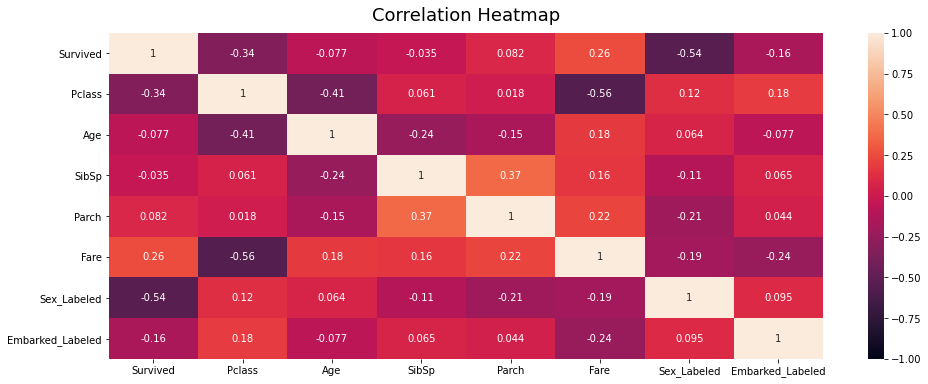

In [92]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_entire.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [93]:
# As Pclass increase age decrease age and pclass has strong negative correlation between each other
# Females most likely to survive
# First class was more likely to survive
# There is a strong negative correlation between Pclass and Fare 
# Passengers who paid more fare was more likely to survive

In [94]:
def find_in_string(str_list, big_str):
    for small_str in str_list:
        if small_str in big_str:
            return small_str

    return None

def titleFind(person):
    title = person['Title']

    if title in ['Mrs.', 'Mr.', 'Miss.', 'Ms.', 'Mme.', 'Mlle.', 'Master.']:
        return 'Passenger'
    elif title in ['Lady.', 'Sir.', 'Don.', 'Jonkheer.', 'Countess.']:
        return 'Royale'
    elif title in ['Major.', 'Col.', 'Rev.', 'Capt.', 'Dr.']:
        return 'Crew'
    else:
        return title

In [95]:
X_entire.Age = X_entire.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x : x.fillna(x.mean()))

X_entire.Embarked = X_entire.groupby(['Pclass'])['Embarked'].apply(lambda x :x.fillna(x.mode().iloc[0]))

X_entire.Fare = X_entire.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.mean()))

X_entire['Family_Size'] = X_entire.apply(lambda x: x.SibSp + x.Parch + 1, axis=1)

X_entire['Fare_Per_Person'] = X_entire.apply(lambda x: x.Fare / x.Family_Size , axis=1)

X_entire.drop(['Cabin'], axis=1, inplace=True)

print(X_entire.isna().sum())

Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
Sex_Labeled           0
Embarked_Labeled      0
Family_Size           0
Fare_Per_Person       0
dtype: int64


In [96]:
title_list=['Mrs.', 'Mr.', 'Master.', 'Miss.', 'Major.', 'Rev.',
                    'Dr.', 'Ms.', 'Mlle.', 'Col.', 'Capt.', 'Mme.', 'Countess.',
                    'Don.', 'Jonkheer.', 'Sir.', 'Lady.']

X_entire['Title']=X_entire['Name'].map(lambda x: find_in_string(title_list, x))
X_entire['Title'] = X_entire.apply(titleFind, axis=1)

X_entire.drop(['Name'], axis=1, inplace=True)

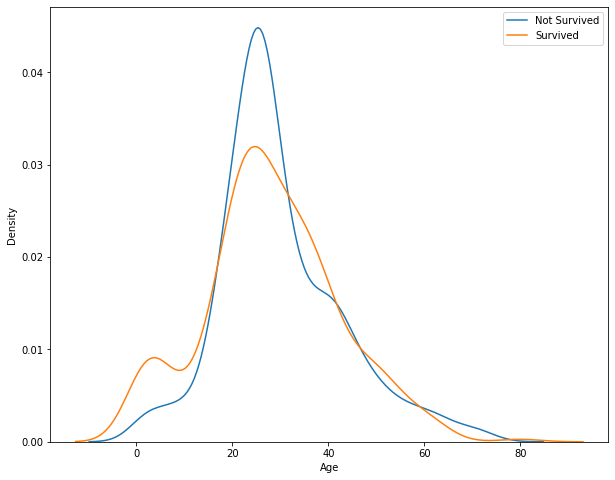

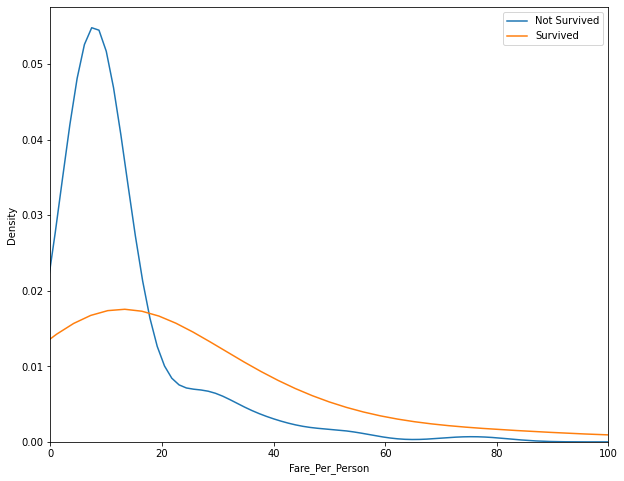

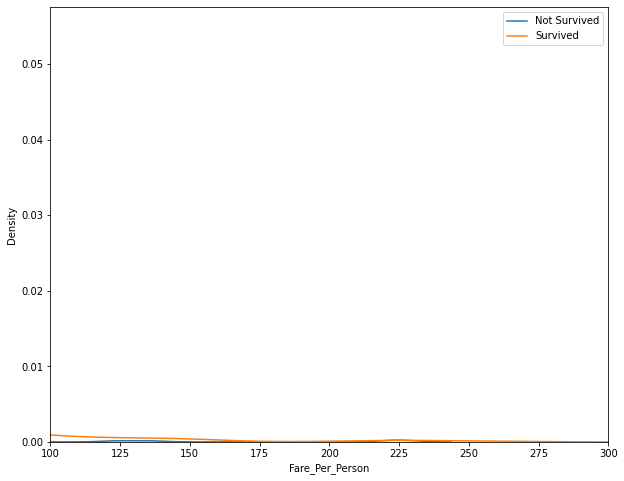

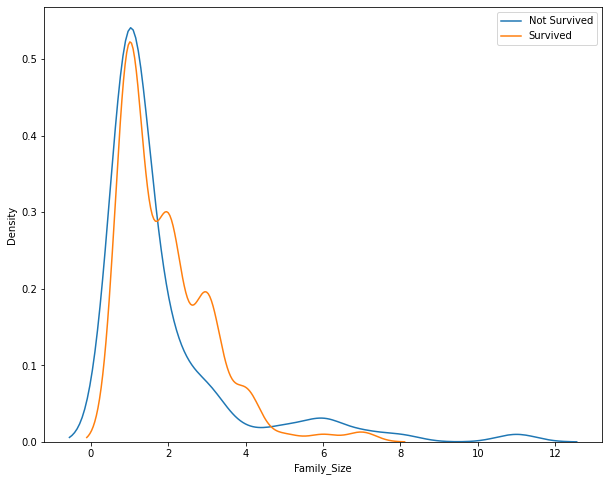

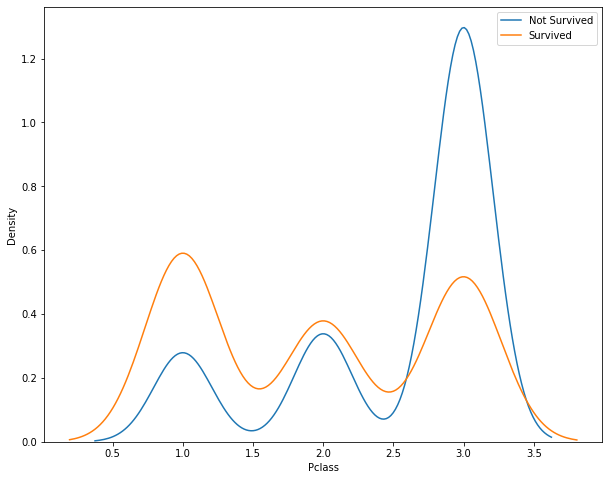

In [97]:
fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(X_entire.loc[X_entire.Survived == 0, 'Age'],label='Not Survived')
sns.kdeplot(X_entire.loc[X_entire.Survived == 1, 'Age'],label='Survived')
plt.legend()

fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(X_entire.loc[X_entire.Survived == 0, 'Fare_Per_Person'],label='Not Survived')
sns.kdeplot(X_entire.loc[X_entire.Survived == 1, 'Fare_Per_Person'],label='Survived')
axs.set_xlim(0, 100)
plt.legend()

fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(X_entire.loc[X_entire.Survived == 0, 'Fare_Per_Person'],label='Not Survived')
sns.kdeplot(X_entire.loc[X_entire.Survived == 1, 'Fare_Per_Person'],label='Survived')
axs.set_xlim(100, 300)
plt.legend()

fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(X_entire.loc[X_entire.Survived == 0, 'Family_Size'],label='Not Survived')
sns.kdeplot(X_entire.loc[X_entire.Survived == 1, 'Family_Size'],label='Survived')
plt.legend()

fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(X_entire.loc[X_entire.Survived == 0, 'Pclass'],label='Not Survived')
sns.kdeplot(X_entire.loc[X_entire.Survived == 1, 'Pclass'],label='Survived')
plt.legend()

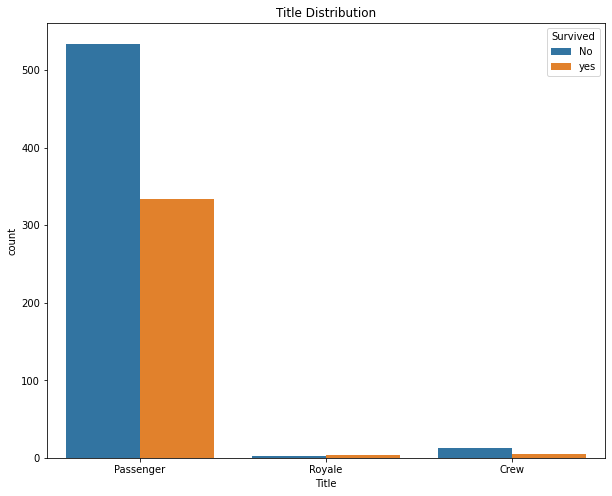

In [98]:
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Title',hue='Survived',data=X_entire)
plt.title("Title Distribution")
leg=ax.get_legend()
leg.set_title('Survived')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

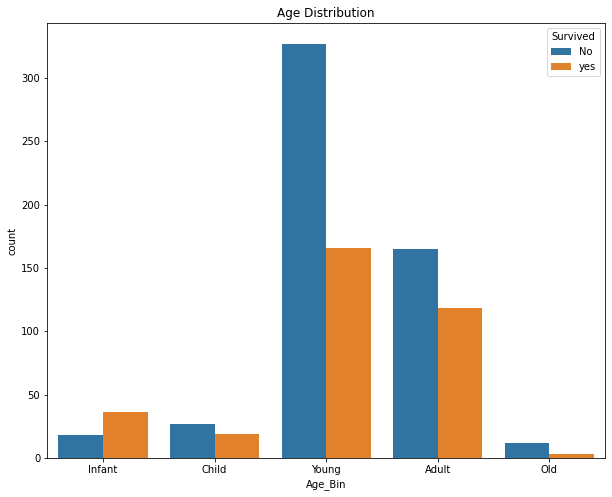

In [99]:
X_entire['Age_Bin'] = pd.cut(X_entire['Age'], bins=[-1, 8, 16, 32, 62, 100], labels=["Infant", "Child", "Young", "Adult", "Old"])

plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Age_Bin',hue='Survived',data=X_entire)
plt.title("Age Distribution")
leg=ax.get_legend()
leg.set_title('Survived')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")


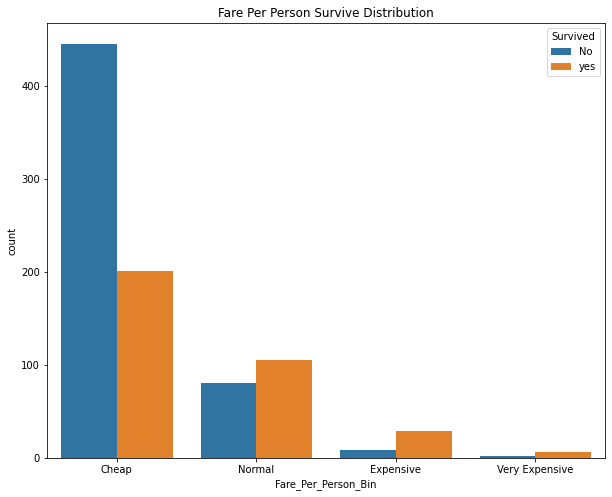

In [100]:
X_entire['Fare_Per_Person_Bin'] = pd.cut(X_entire['Fare_Per_Person'], bins=[0, 18, 60, 160, 600], labels=["Cheap", "Normal", "Expensive", "Very Expensive"])

plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Fare_Per_Person_Bin',hue='Survived',data=X_entire)
plt.title("Fare Per Person Survive Distribution")
leg=ax.get_legend()
leg.set_title('Survived')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

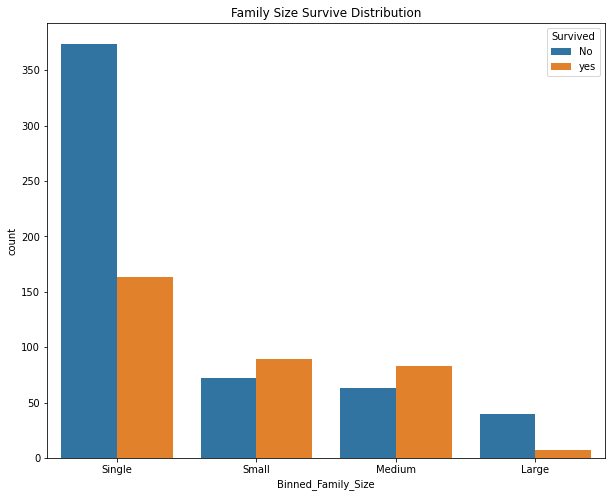

In [101]:
X_entire['Binned_Family_Size'] = pd.cut(X_entire['Family_Size'], bins=[0, 1, 2, 5, 15], labels=["Single", "Small", "Medium", "Large"])

plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Binned_Family_Size',hue='Survived',data=X_entire)
plt.title("Family Size Survive Distribution")
leg=ax.get_legend()
leg.set_title('Survived')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

In [102]:

X_entire.drop(['Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_Labeled', 'Embarked_Labeled', 'Family_Size', 'Fare_Per_Person'], axis=1, inplace=True)
X_full = X_entire[:891]
X_test_full = X_entire[891:]
X_test_full = X_test_full.drop(['Survived'], axis=1)
X_entire.head()

,Survived,Pclass,Sex,Embarked,Title,Age_Bin,Fare_Per_Person_Bin,Binned_Family_Size
PassengerId,,,,,,,,
1,0.0,3,male,S,Passenger,Young,Cheap,Small
2,1.0,1,female,C,Passenger,Adult,Normal,Small
3,1.0,3,female,S,Passenger,Young,Cheap,Single
4,1.0,1,female,S,Passenger,Adult,Normal,Small
5,0.0,3,male,S,Passenger,Adult,Cheap,Single


In [103]:
y = X_full.Survived
X_full = X_full.drop(['Survived'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2)

In [104]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'Age_Bin', 'Binned_Family_Size', 'Fare_Per_Person_Bin']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_encoder = OH_encoder.fit(X_test_full[categorical_cols])
OH_cols_full = pd.DataFrame(OH_encoder.transform(X_full[categorical_cols]))
OH_cols_train = pd.DataFrame(OH_encoder.transform(X_train[categorical_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[categorical_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_full[categorical_cols]))


OH_cols_full.index = X_full.index
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_test.index = X_test_full.index

num_X_full = X_full.drop(categorical_cols, axis=1)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_valid = X_valid.drop(categorical_cols, axis=1)
num_X_test = X_test_full.drop(categorical_cols, axis=1)

OH_X_full = pd.concat([num_X_full, OH_cols_full], axis=1)
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def get_acc(rand_state, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=rand_state)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    
    return(accuracy_score(val_y, preds_val))

max_acc = 0
best_state = 0
#for i in range(600):
   # acc = get_acc(i, OH_X_train, OH_X_valid, y_train, y_valid)
    #if acc > max_acc:
      #  max_acc = acc
      #  best_state = i

In [106]:
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=452)

print(OH_X_full)
model.fit(OH_X_full, y)
preds_val = model.predict(OH_X_test)
output = pd.DataFrame({'PassengerId': OH_X_test.index,
                       'Survived': preds_val.astype(int)})
output.to_csv('submission.csv', index=False)

              0    1    2    3    4    5    6    7    8    9   ...   15   16  \
PassengerId                                                    ...             
1            0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
2            1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
3            0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
4            1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
5            0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
887          0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0   
888          1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
889          0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
890          1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
891          0.0  0.0  1.0  0.0  1.0  0.